In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('spambase.txt',sep=',',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
col=['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab' ,
'word_freq_labs' ,
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415' ,
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total','spam']
len(col)

58

In [ ]:
df.columns=col

In [ ]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
df['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df.drop('spam',axis=1)
Y=df['spam']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
folds=KFold(n_splits=5,shuffle=True)
svc=SVC(C=1)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
result=cross_val_score(svc,X_train,Y_train,scoring='accuracy',cv=folds)
result

array([0.94021739, 0.93342391, 0.92391304, 0.9375    , 0.92798913])

In [ ]:
print(result.mean())

0.9326086956521739


In [ ]:
svc.fit(X_train,Y_train)

SVC(C=1)

In [ ]:
svc.score(X_test,Y_test)

0.9131378935939196

In [ ]:
refrom sklearn import metrics

In [ ]:
Y_pred=svc.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       563
           1       0.92      0.85      0.88       358

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921



In [ ]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.01,0.1,1,10,100,1000]}
model_cv=GridSearchCV(svc,param_grid=params,scoring='accuracy',return_train_score=True,cv=5,n_jobs=-1)
model_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(C=1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy')

In [ ]:
result=model_cv.cv_results_
result=pd.DataFrame(result)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.253470,0.163796,0.460945,0.157157,0.01,{'C': 0.01},0.668478,0.692935,0.680707,0.679348,...,0.682337,0.008696,6,0.689878,0.673573,0.687160,0.684443,0.685802,0.684171,0.005595
1,0.535029,0.010208,0.201541,0.003794,0.1,{'C': 0.1},0.896739,0.923913,0.915761,0.914402,...,0.909511,0.010924,5,0.915082,0.910666,0.910326,0.913043,0.917459,0.913315,0.002695
2,0.410102,0.065043,0.123090,0.003963,1,{'C': 1},0.930707,0.949728,0.932065,0.940217,...,0.934511,0.009999,2,0.948370,0.946671,0.949389,0.948370,0.952446,0.949049,0.001909
3,0.333943,0.012028,0.107725,0.008149,10,{'C': 10},0.937500,0.938859,0.947011,0.947011,...,0.937228,0.011445,1,0.966712,0.968750,0.968071,0.965353,0.969090,0.967595,0.001386
4,0.694330,0.159647,0.149607,0.035617,100,{'C': 100},0.933424,0.933424,0.934783,0.934783,...,0.929348,0.009530,3,0.986753,0.987772,0.987772,0.986073,0.987092,0.987092,0.000644
5,0.719907,0.151596,0.073806,0.016087,1000,{'C': 1000},0.902174,0.922554,0.933424,0.927989,...,0.918478,0.012213,4,0.994905,0.994226,0.993546,0.992527,0.993886,0.993818,0.000786


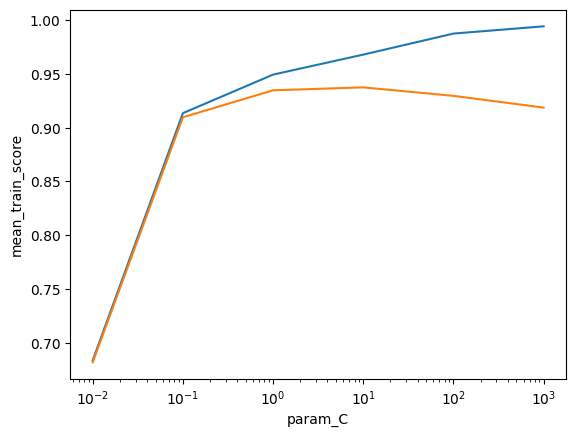

In [ ]:
sns.lineplot(y=result['mean_train_score'],x=result['param_C'])
sns.lineplot(y=result['mean_test_score'],x=result['param_C'])
plt.xscale('log')

In [ ]:
model_cv.best_params_

{'C': 10}

In [ ]:
model_cv.best_score_

0.9372282608695652

In [ ]:
best_param=model_cv.best_params_['C']

In [ ]:
svc=SVC(C=best_param)

In [ ]:
svc.fit(X_train,Y_train)

SVC(C=10)

In [ ]:
svc.score(X_test,Y_test)

0.9250814332247557

#Linear svm model gave test accuracy=92.5,cv=93.72

In [ ]:
svc=SVC(kernel='rbf',C=1)

In [ ]:
svc.fit(X_train,Y_train)

SVC(C=1)

In [ ]:
svc.score(X_test,Y_test)

0.9131378935939196

In [ ]:
param={'gamma':[1e-3,1e-2,1e-1,1],
       'C':[1,10,100]}
model_cv=GridSearchCV(SVC(kernel='rbf'),param_grid=param,scoring='accuracy',n_jobs=-1,return_train_score=True,cv=3,verbose=1)
model_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
result=pd.DataFrame(model_cv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.346454,0.009547,0.250659,0.001162,1,0.001,"{'C': 1, 'gamma': 0.001}",0.895681,0.906275,0.903752,0.901903,0.004519,9,0.909091,0.904199,0.907090,0.906793,0.002008
1,0.250812,0.008495,0.171711,0.004617,1,0.01,"{'C': 1, 'gamma': 0.01}",0.931540,0.936430,0.926591,0.931520,0.004017,5,0.942112,0.938035,0.947840,0.942662,0.004022
2,0.469207,0.014889,0.303776,0.004843,1,0.1,"{'C': 1, 'gamma': 0.1}",0.914425,0.917685,0.902936,0.911682,0.006326,7,0.973909,0.973909,0.976365,0.974728,0.001158
3,0.811818,0.015673,0.498709,0.001540,1,1,"{'C': 1, 'gamma': 1}",0.786471,0.766911,0.768352,0.773912,0.008900,12,0.996331,0.992662,0.993888,0.994294,0.001525
4,0.371069,0.090356,0.258871,0.062690,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933985,0.938875,0.928222,0.933694,0.004354,3,0.940073,0.937220,0.940913,0.939402,0.001581
5,0.391409,0.025049,0.240023,0.028952,10,0.01,"{'C': 10, 'gamma': 0.01}",0.940505,0.944580,0.929038,0.938041,0.006580,2,0.962495,0.958418,0.962510,0.961141,0.001925
6,0.724659,0.066734,0.301163,0.018096,10,0.1,"{'C': 10, 'gamma': 0.1}",0.921760,0.920130,0.903752,0.915214,0.008132,6,0.993070,0.990216,0.991850,0.991712,0.001169
7,0.826711,0.005149,0.511983,0.005503,10,1,"{'C': 10, 'gamma': 1}",0.792991,0.770986,0.776509,0.780162,0.009347,10,0.997554,0.996739,0.996740,0.997011,0.000384
8,0.210655,0.004746,0.115608,0.002860,100,0.001,"{'C': 100, 'gamma': 0.001}",0.940505,0.938875,0.934747,0.938043,0.002423,1,0.952303,0.947004,0.952323,0.950543,0.002503
9,0.292674,0.028310,0.143002,0.021713,100,0.01,"{'C': 100, 'gamma': 0.01}",0.935615,0.946210,0.919250,0.933692,0.011090,4,0.977986,0.981655,0.981663,0.980435,0.001731


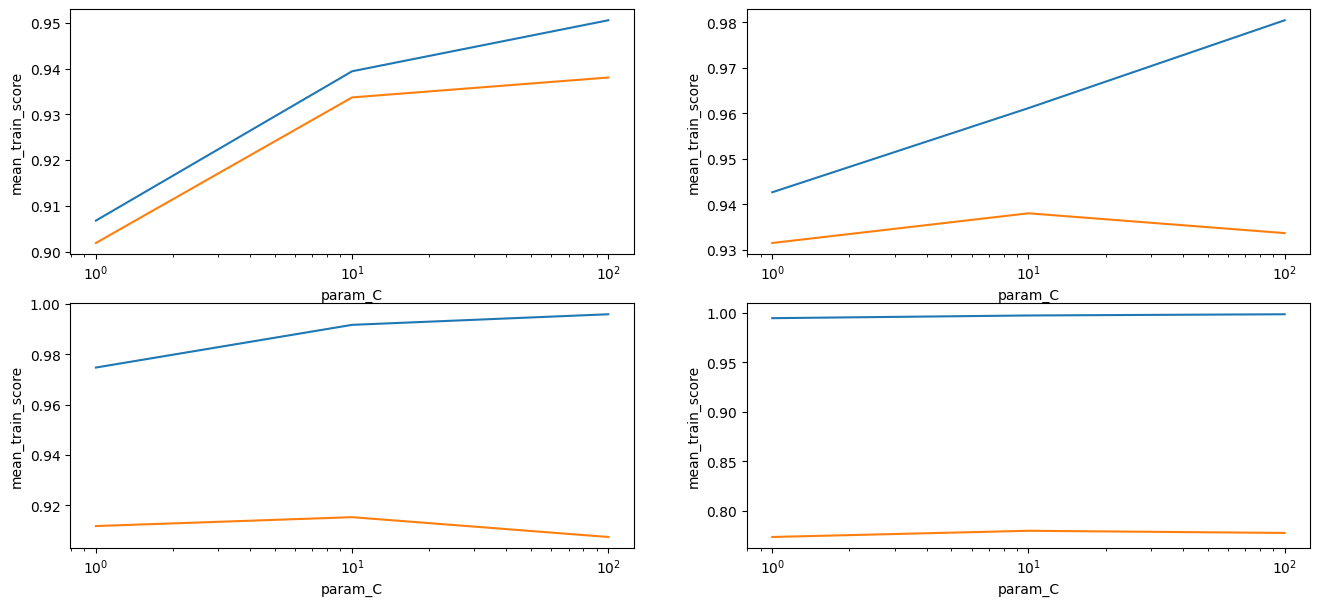

In [ ]:
#result['param_C']=result['param_C'].astype('int')
plt.figure(figsize=(16,7))
plt.subplot(221)
gamma1=result[result['param_gamma']==0.001]
gamma2=result[result['param_gamma']==0.01]
gamma3=result[result['param_gamma']==0.1]
gamma4=result[result['param_gamma']==1]
sns.lineplot(y=gamma1['mean_train_score'],x=gamma1['param_C'])
sns.lineplot(y=gamma1['mean_test_score'],x=gamma1['param_C'])
plt.xscale('log')
plt.subplot(222)
sns.lineplot(y=gamma2['mean_train_score'],x=gamma2['param_C'])
sns.lineplot(y=gamma2['mean_test_score'],x=gamma2['param_C'])
plt.xscale('log')
plt.subplot(223)
sns.lineplot(y=gamma3['mean_train_score'],x=gamma3['param_C'])
sns.lineplot(y=gamma3['mean_test_score'],x=gamma3['param_C'])
plt.xscale('log')
plt.subplot(224)
sns.lineplot(y=gamma4['mean_train_score'],x=gamma4['param_C'])
sns.lineplot(y=gamma4['mean_test_score'],x=gamma4['param_C'])
plt.xscale('log')

In [ ]:
model_cv.best_score_

0.9380425827615287

In [ ]:
model_cv.best_params_

{'C': 100, 'gamma': 0.001}

In [ ]:
best_c=model_cv.best_params_['C']
best_gamma=model_cv.best_params_['gamma']

In [ ]:
svc=SVC(C=best_c,gamma=best_gamma,kernel='rbf')

In [ ]:
svc.fit(X_train,Y_train)

SVC(C=100, gamma=0.001)

In [ ]:
svc.score(X_test,Y_test)

0.9142236699239956

#rbf kernel cv score=93.8,test score=91.42

#There is not much difference in rbf kernel and linear svm in this case